<a href="https://colab.research.google.com/github/kathir1406/-Basic-Mars-Crop-Predictor/blob/main/mars_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Mars soil data for five crops with different water levels
data = pd.read_csv('/content/mars_soil_data_five_crops_with_diff_water_levels.csv')

# Preprocess data
X = data.drop(['nutrient_content_rice', 'nutrient_content_wheat', 'nutrient_content_ragi', 'nutrient_content_cotton', 'nutrient_content_tomato',
               'water_level_rice', 'water_level_wheat', 'water_level_ragi', 'water_level_cotton', 'water_level_tomato'], axis=1)
y = data[['nutrient_content_rice', 'nutrient_content_wheat', 'nutrient_content_ragi', 'nutrient_content_cotton', 'nutrient_content_tomato',
          'water_level_rice', 'water_level_wheat', 'water_level_ragi', 'water_level_cotton', 'water_level_tomato']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multi-output random forest regressor model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print('Mean Squared Error for each target:', mse)
print('R-squared for each target:', model.score(X_test, y_test))


Mean Squared Error for each target: [9.52625 9.52625 9.52625 9.52625 9.10125 3.7186  3.7186  3.7186  3.7186
 3.7186 ]
R-squared for each target: 0.09292040816326472


Predicted Nutrient Content and Water Level for each crop: [[120.7  130.7  140.7  150.7  160.7   91.82  81.82  71.82 101.82 111.82]]


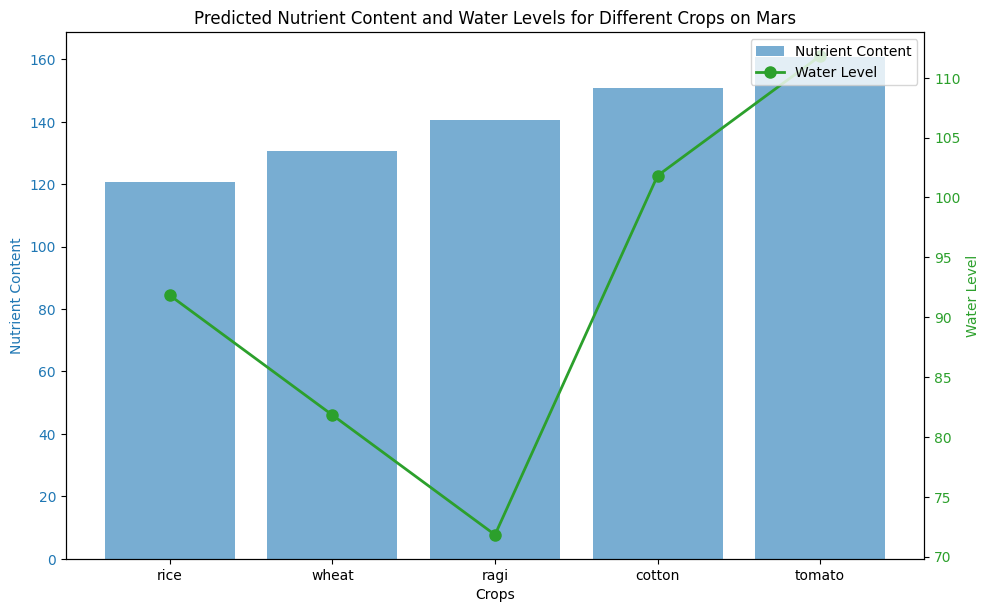

In [ ]:
# Use model to predict soil nutrient properties and water level for new input data
input_data = pd.DataFrame({'pH': [7.5], 'temperature': [20], 'moisture': [65]})
predicted_nutrient_content_and_water_level = model.predict(input_data)
print('Predicted Nutrient Content and Water Level for each crop:', predicted_nutrient_content_and_water_level)

# Visualize the predicted nutrient content and water levels
crops = ['rice', 'wheat', 'ragi', 'cotton', 'tomato']
predicted_nutrients = predicted_nutrient_content_and_water_level[0][:5]
predicted_water_levels = predicted_nutrient_content_and_water_level[0][5:]

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Crops')
ax1.set_ylabel('Nutrient Content', color=color)
ax1.bar(crops, predicted_nutrients, color=color, alpha=0.6, label='Nutrient Content')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Water Level', color=color)
ax2.plot(crops, predicted_water_levels, color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='Water Level')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Predicted Nutrient Content and Water Levels for Different Crops on Mars')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()
